In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('creditcard.csv')
class_label = df['Class']
df = df.drop(columns=['Class'])
df = df.drop(columns=['Amount'])
df = df.drop(columns=['Time'])
df.dropna(inplace=True)
df = df.drop_duplicates()

display(df)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [63]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df)

# Calculo distancia ate centro
centers = kmeans.cluster_centers_
distances = np.linalg.norm(df - centers[kmeans.labels_], axis=1)
distances_scaled = StandardScaler().fit_transform(distances.reshape(-1, 1))

# Adicionar as labels do cluster à tabela
df['Cluster'] = kmeans.labels_
df['Distance_to_Center'] = distances_scaled
df['Class'] = class_label

display(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Cluster,Distance_to_Center,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2,-0.282460,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,4,-0.706330,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.677440,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.080328,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,2,-0.427529,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,1,4.738159,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,2,0.005619,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,3,-0.239587,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2,0.335128,0


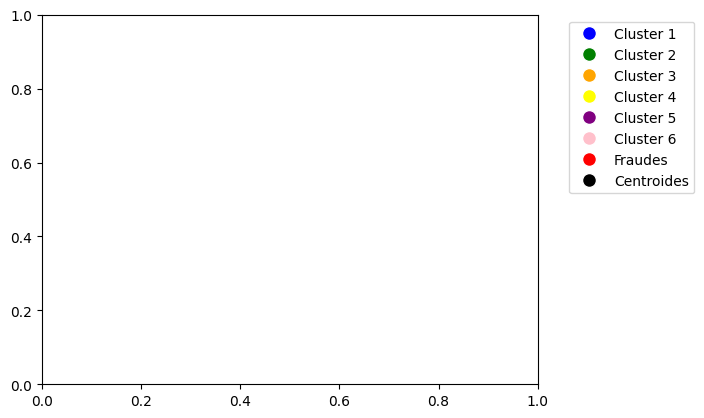

In [126]:
# Template da Legenda
colors = ['blue','green','orange', 'yellow', 'purple', 'pink']
clusters = df['Cluster'].unique()
legend_elements = []
for i in np.sort(clusters):
    legend_elements.append( plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i%len(clusters)], markersize=10, label=f'Cluster {i+1}'))

legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraudes'))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Centroides'))
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))


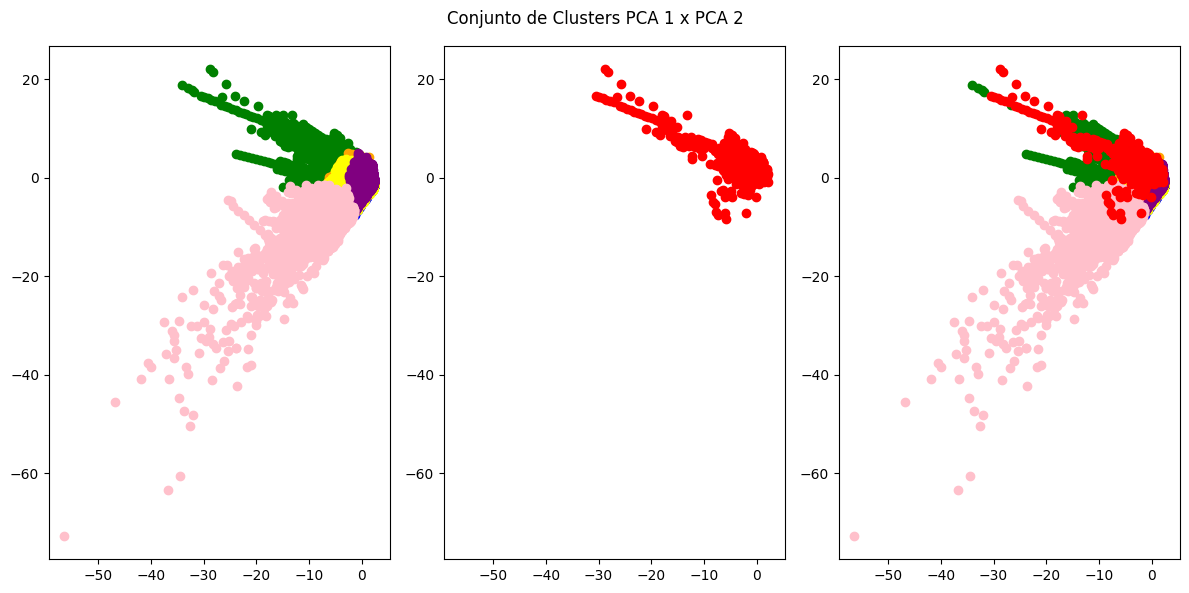

In [131]:
# Conjunto de clusters
xlim = []
ylim = []

for k in range(1):

  # Clusters
  fig, axs = plt.subplots(1, 3, figsize=(12, 6))
  fig.suptitle(f'Conjunto de Clusters PCA {k+1} x PCA {k+2}')
  for i in np.sort(clusters):
      clustered_data = df[df['Cluster'] == i]
      axs[0].scatter(clustered_data.iloc[:, k],
                  clustered_data.iloc[:, k+1],
                  color=colors[i%len(clusters)], label=f'Cluster {i}')
  xlim.append(axs[0].get_xlim())
  ylim.append(axs[0].get_ylim())

  # Fraudes
  axs[1].scatter(df[df['Class'] == 1].iloc[:, k], df[df['Class'] == 1].iloc[:, k+1], color='red')
  axs[1].set_xlim(xlim[k])
  axs[1].set_ylim(ylim[k])

  # Clusters + Fraudes
  for i in np.sort(clusters):
      clustered_data = df[df['Cluster'] == i]
      axs[2].scatter(clustered_data[clustered_data['Class'] == 0].iloc[:, k],
                  clustered_data[clustered_data['Class'] == 0].iloc[:, k+1],
                  color=colors[i%len(clusters)], label=f'Cluster {i}')
  for i in np.sort(clusters):
      clustered_data = df[df['Cluster'] == i]
      axs[2].scatter(clustered_data[clustered_data['Class'] == 1].iloc[:, k],
                  clustered_data[clustered_data['Class'] == 1].iloc[:, k+1],
                  color='red', label='Outlier')
  axs[2].set_xlim(xlim[k])
  axs[2].set_ylim(ylim[k])

  # Plot
  plt.tight_layout()
  plt.show()


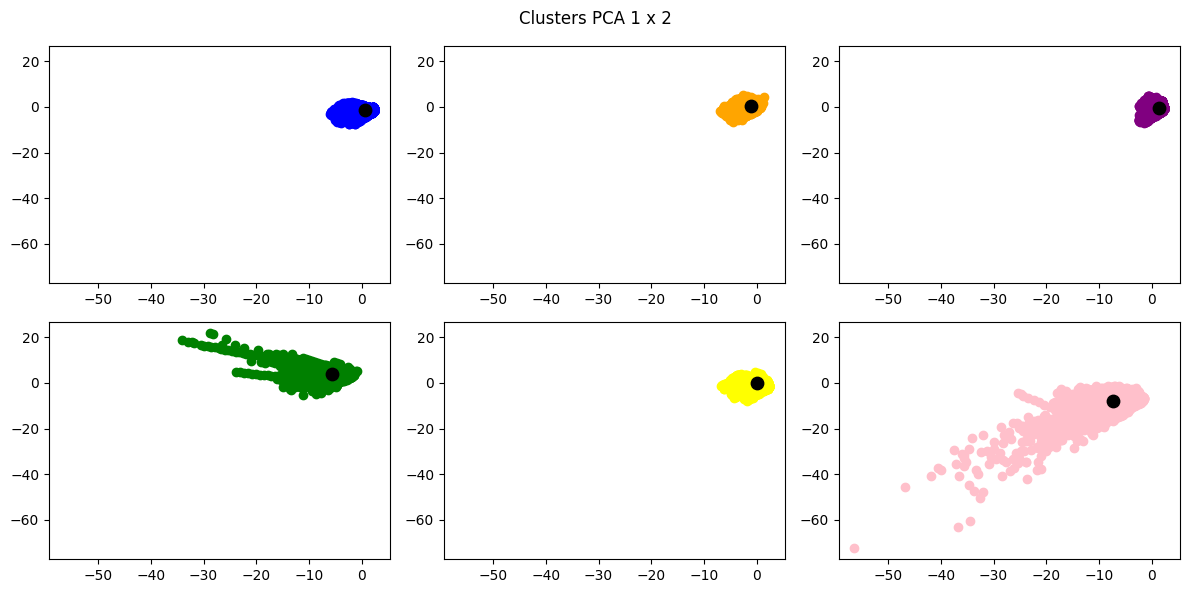

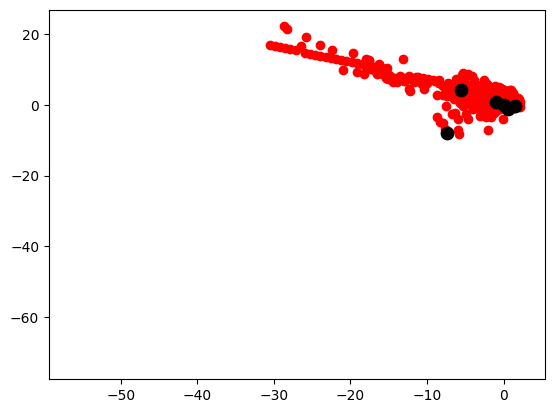

In [132]:
# Clusters individuais mesma escala
for k in range(1):
  # Clusters
  fig, axs = plt.subplots(2, 3, figsize=(12, 6))
  fig.suptitle(f'Clusters PCA {k+1} x {k+2}')
  for i in np.sort(clusters):
      clustered_data = df[df['Cluster'] == i]
      row = i % 2
      col = i // 2
      axs[row][col].scatter(clustered_data.iloc[:, k], clustered_data.iloc[:, k+1], color=colors[i%len(clusters)])
      axs[row][col].scatter(centers[i][k], centers[i][k+1], color = 'black', s = 80)
      axs[row][col].set_xlim(xlim[k])
      axs[row][col].set_ylim(ylim[k])
  plt.tight_layout()
  plt.show()

# Fraudes
  plt.scatter(df[df['Class'] == 1].iloc[:, k], df[df['Class'] == 1].iloc[:, k+1], color='red')
  for j in centers:
      plt.scatter(j[k], j[k+1], color = 'black', s = 80)
  plt.xlim(xlim[k])
  plt.ylim(ylim[k])
  plt.show()

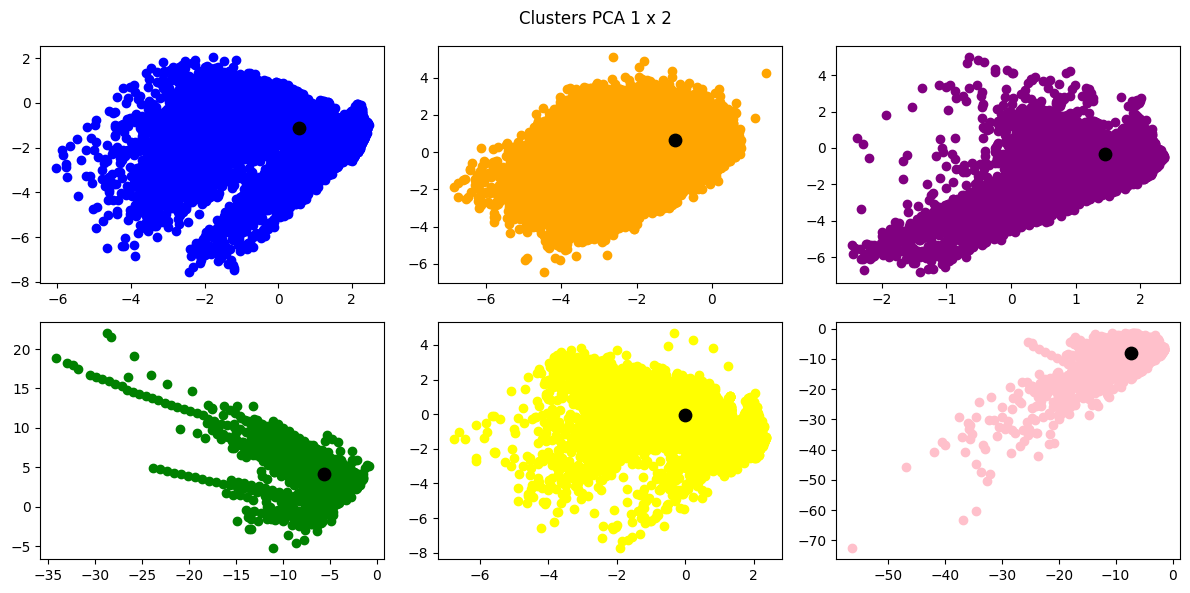

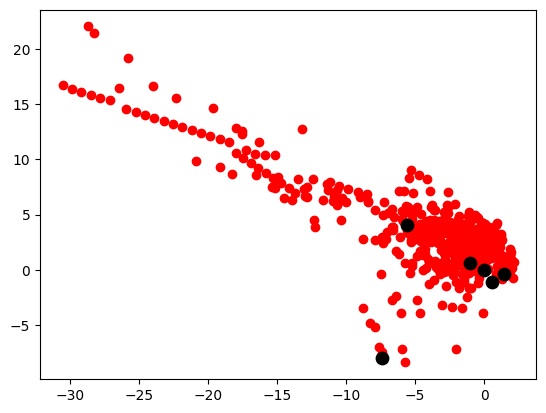

In [133]:
# Clusters individuais zoom
for k in range(1):
  # Clusters
  fig, axs = plt.subplots(2, 3, figsize=(12, 6))
  fig.suptitle(f'Clusters PCA {k+1} x {k+2}')
  for i in np.sort(clusters):
      clustered_data = df[df['Cluster'] == i]
      row = i % 2
      col = i // 2
      axs[row][col].scatter(clustered_data.iloc[:, k], clustered_data.iloc[:, k+1], color=colors[i%len(clusters)])
      axs[row][col].scatter(centers[i][k], centers[i][k+1], color = 'black', s = 80)
  plt.tight_layout()
  plt.show()

# Fraudes
  plt.scatter(df[df['Class'] == 1].iloc[:, k], df[df['Class'] == 1].iloc[:, k+1], color='red')
  for j in centers:
      plt.scatter(j[k], j[k+1], color = 'black', s = 80)
  plt.show()